In [1]:
# Importing all the libraries needed
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import os, requests, cv2, random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

## 1. Loading data and preprocessing it

In [2]:
# loading the pictures of tomatoes

train_data_dir = '../input/tomatoleaf/tomato/train'
test_data_dir = '../input/tomatoleaf/tomato/val' #this folder will be used for evaluating model's perfomance

In [3]:
# for this challenge we are using ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale=1/255.0,
                               shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.3)# specifying the validation split inside the function

test_datagen = ImageDataGenerator(rescale=1/255.0,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [4]:
train_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='training')

Found 7000 images belonging to 10 classes.


In [5]:
val_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224,224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='validation')

Found 3000 images belonging to 10 classes.


In [6]:
test_gen = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle = False) #shuffle will not affect the accuracy of the model, but will affect the computation of some metrics that depend on the order of the samples

Found 1000 images belonging to 10 classes.


## 1a. Building a CNN model with a learning rate of 0.001

In [7]:
# CNN model layers

cnn = models.Sequential()

cnn.add(layers.Conv2D (32, kernel_size = (3,3), activation='relu', input_shape = [224, 224,3])),
cnn.add(layers.MaxPooling2D(pool_size = (2, 2))),

cnn.add(layers.Conv2D(64, (3,3), activation='relu')),
cnn.add(layers. MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D (64, (3,3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers. Conv2D (64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Flatten()),

cnn.add(layers.Dense(64,activation='relu'))
#output layer
cnn.add(layers.Dense(10,activation='softmax'))

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [9]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [10]:
cnn.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

Before training the model, let's define an Early Stopping to avoid overfitting.

In [11]:
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 20, 
                   verbose = 1, 
                   restore_best_weights = True)

In [12]:
history = cnn.fit(x = train_gen,
                    callbacks = [es], 
                    steps_per_epoch = 7000/32,
                    epochs = 100,
                    validation_steps = 3000/32,
                    validation_data = val_gen)  

Epoch 1/100
218/218 [==============================] - 169s 724ms/step - loss: 2.1155 - accuracy: 0.2064 - val_loss: 1.8472 - val_accuracy: 0.3030
Epoch 2/100
218/218 [==============================] - 112s 511ms/step - loss: 1.4899 - accuracy: 0.4624 - val_loss: 1.1827 - val_accuracy: 0.5750
Epoch 3/100
218/218 [==============================] - 116s 529ms/step - loss: 0.9530 - accuracy: 0.6634 - val_loss: 0.8362 - val_accuracy: 0.7133
Epoch 4/100
218/218 [==============================] - 115s 527ms/step - loss: 0.7467 - accuracy: 0.7454 - val_loss: 0.6510 - val_accuracy: 0.7817
Epoch 5/100
218/218 [==============================] - 116s 531ms/step - loss: 0.6066 - accuracy: 0.7866 - val_loss: 0.5802 - val_accuracy: 0.7867
Epoch 6/100
218/218 [==============================] - 114s 521ms/step - loss: 0.5258 - accuracy: 0.8140 - val_loss: 0.5325 - val_accuracy: 0.8080
Epoch 7/100
218/218 [==============================] - 116s 529ms/step - loss: 0.4599 - accuracy: 0.8419 - val_loss: 0

In [13]:
scores = cnn.evaluate(test_gen)

32/32 [==============================] - 17s 542ms/step - loss: 0.2394 - accuracy: 0.9380


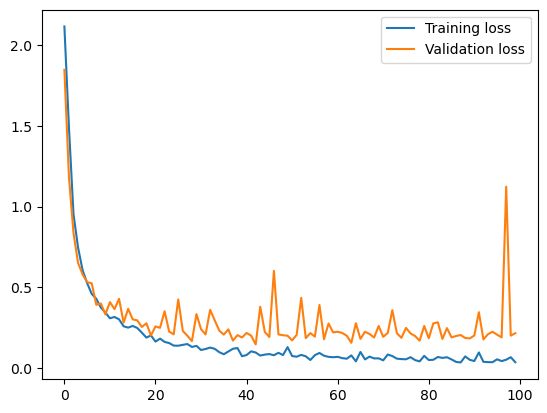

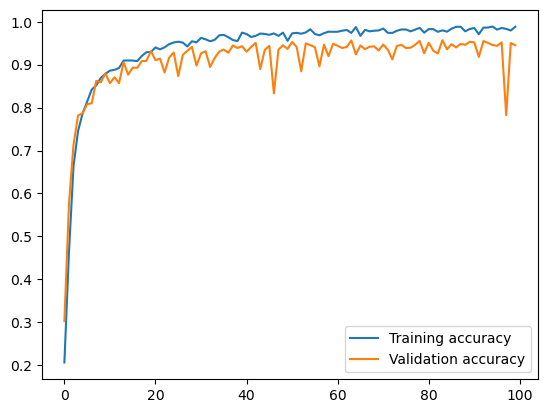

In [14]:
# plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [15]:
# don't forget to save your model for later
cnn.save('cnn-1.h5')

## Making predictions, confusion matrix, metrics.

In [16]:
test_steps_per_epoch = np.math.ceil(test_gen.samples / test_gen.batch_size)

In [17]:
# Predict classes
predictions = cnn.predict(test_gen, steps=test_steps_per_epoch)

32/32 [==============================] - 11s 333ms/step


In [18]:
predictions[1]

array([9.9999917e-01, 1.4556218e-09, 9.3728129e-11, 2.0403895e-13,
       2.6429531e-10, 1.9598856e-13, 8.2464953e-07, 6.7219363e-10,
       1.8607172e-25, 1.7783580e-15], dtype=float32)

In [19]:
predicted_classes = np.argmax(predictions,axis=1)

In [20]:
# Get ground-truth classes and class-labels
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

In [21]:
# Print confusion matrix
confusion_matrix = confusion_matrix(test_gen.classes, predicted_classes)
print(confusion_matrix)

[[ 99   1   0   0   0   0   0   0   0   0]
 [  1  93   2   2   0   0   2   0   0   0]
 [  1   5  90   3   0   0   0   1   0   0]
 [  1   0   3  96   0   0   0   0   0   0]
 [  1   7   5   5  79   0   3   0   0   0]
 [  0   0   0   1   0  96   3   0   0   0]
 [  3   2   0   1   1   1  92   0   0   0]
 [  2   0   0   1   0   1   0  96   0   0]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0   0   0   2   0   0   0   0   0  98]]


In [22]:
# To check F1 score, recall etc.
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.92      0.99      0.95       100
                        Tomato___Early_blight       0.86      0.93      0.89       100
                         Tomato___Late_blight       0.90      0.90      0.90       100
                           Tomato___Leaf_Mold       0.86      0.96      0.91       100
                  Tomato___Septoria_leaf_spot       0.99      0.79      0.88       100
Tomato___Spider_mites Two-spotted_spider_mite       0.98      0.96      0.97       100
                         Tomato___Target_Spot       0.92      0.92      0.92       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.96      0.97       100
                 Tomato___Tomato_mosaic_virus       1.00      1.00      1.00       100
                             Tomato___healthy       1.00      0.98      0.99       100

                                     accu